# To learn th <font color ="red"> `new` </font> features and of <font color ="green">  `tensorflow` </font> library like callbacks[link text]

In [51]:
# title Default title text
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten,Conv2D,AveragePooling2D
from keras.datasets import mnist
from keras.callbacks import EarlyStopping,ModelCheckpoint,CSVLogger,TensorBoard

In [52]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()


In [53]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [54]:
# generator creation
x_trainp = x_train//255
x_testp = x_test//255

In [55]:
x_trainp

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [56]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [57]:
# lee net model  architecture
# cnn  logical structure
model=Sequential()
model.add(Input(shape =(28,28,1)))
model.add(Conv2D(6,(5,5),strides=(1,1),padding="valid",activation="tanh"))
model.add(AveragePooling2D(pool_size=(2,2),strides=(1,1)))  # 1st layer 5*5*6

model.add(Conv2D(16,(5,5),strides=(1,1),padding="valid",activation="tanh"))
model.add(AveragePooling2D(pool_size=(2,2),strides=(1,1))) # 2nd layer  5*5*30

model.add(Flatten())
# Ann  logical structure
model.add(Dense(120,activation="tanh"))
model.add(Dense(84,activation="tanh"))
model.add(Dense(10,activation="softmax"))


In [58]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 23, 23, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 19, 19, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 18, 18, 16)        0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 5184)              0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [59]:
model.compile(loss="sparse_categorical_crossentropy",optimizer ="sgd",metrics=['accuracy'])


In [60]:
early = EarlyStopping(monitor='val_loss',min_delta=0.01,patience=3,verbose=1,start_from_epoch=3)


In [61]:
check_point = ModelCheckpoint(r"\model_save{epoch}.h5", monitor='val_loss',verbose=1, save_best_only=True)


In [62]:
csv = CSVLogger(r"/content/drive/MyDrive/best_models.csv")


In [63]:
history= model.fit(x_trainp,y_train,epochs=15,validation_split=0.2,callbacks=[early,check_point,csv])

Epoch 1/15
1492/1500 [============================>.] - ETA: 0s - loss: 2.1160 - accuracy: 0.2482
Epoch 1: val_loss improved from inf to 1.84168, saving model to \model_save1.h5
1500/1500 [==============================] - 9s 6ms/step - loss: 2.1145 - accuracy: 0.2488 - val_loss: 1.8417 - val_accuracy: 0.3608
Epoch 2/15
1494/1500 [============================>.] - ETA: 0s - loss: 1.7635 - accuracy: 0.3774
Epoch 2: val_loss improved from 1.84168 to 1.69622, saving model to \model_save2.h5
1500/1500 [==============================] - 7s 4ms/step - loss: 1.7631 - accuracy: 0.3777 - val_loss: 1.6962 - val_accuracy: 0.3914
Epoch 3/15
1497/1500 [============================>.] - ETA: 0s - loss: 1.6914 - accuracy: 0.3945
Epoch 3: val_loss improved from 1.69622 to 1.66943, saving model to \model_save3.h5
1500/1500 [==============================] - 7s 5ms/step - loss: 1.6913 - accuracy: 0.3945 - val_loss: 1.6694 - val_accuracy: 0.3977
Epoch 4/15
1490/1500 [============================>.] - ETA

In [72]:
yi_predicted = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [73]:
yi_predicted

array([[5.7786779e-04, 1.8546703e-04, 1.2022902e-03, ..., 9.8491609e-01,
        8.1364327e-04, 2.8119215e-03],
       [2.9322123e-03, 2.9022302e-03, 9.3027025e-01, ..., 6.8555396e-06,
        3.3616796e-03, 3.8478451e-05],
       [3.5104873e-05, 9.6241462e-01, 3.9517609e-03, ..., 4.3083628e-04,
        1.8812696e-02, 7.5191946e-04],
       ...,
       [1.3424772e-02, 1.3070424e-03, 1.7614590e-04, ..., 4.7020815e-02,
        6.9313735e-02, 4.9722633e-01],
       [8.4631383e-02, 1.0647546e-03, 1.1238679e-02, ..., 5.4259491e-03,
        1.3175108e-01, 1.9853825e-02],
       [8.6341808e-03, 8.1529332e-05, 1.1209258e-02, ..., 5.0530587e-05,
        4.8479714e-04, 3.7179198e-04]], dtype=float32)

In [74]:
import numpy as np

In [75]:
# converting the probabilistic values
final_yi_pred = np.argmax(yi_predicted,axis=1)

In [76]:
final_yi_pred

array([7, 2, 1, ..., 9, 5, 6])

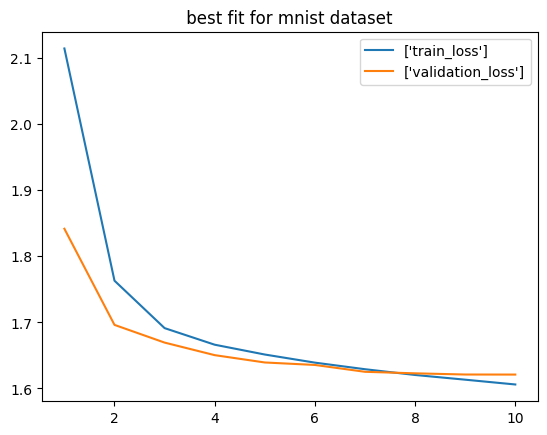

In [84]:
# checking for the underfitting and overfitting
import matplotlib.pyplot as plt
plt.plot(range(1,11),history.history["loss"],label=["train_loss"])
plt.plot(range(1,11),history.history["val_loss"],label=["validation_loss"])
plt.title(" best fit for mnist dataset ")
plt.legend()
plt.show()

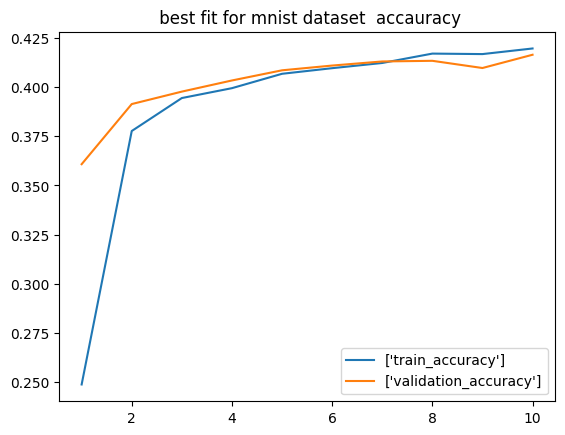

In [85]:
# checking accuracy
plt.plot(range(1,11),history.history["accuracy"],label=["train_accuracy"])
plt.plot(range(1,11),history.history["val_accuracy"],label=["validation_accuracy"])
plt.title(" best fit for mnist dataset  accauracy")
plt.legend()
plt.show()

In [80]:
# evalution of the  test or unseen data
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,final_yi_pred)

0.8758

In [81]:
# classificatuion report of the test data
classification_report(y_test,final_yi_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.98      0.93       980\n           1       1.00      0.80      0.89      1135\n           2       0.85      0.93      0.89      1032\n           3       0.81      0.90      0.85      1010\n           4       0.88      0.85      0.86       982\n           5       0.95      0.83      0.89       892\n           6       0.95      0.95      0.95       958\n           7       0.97      0.75      0.85      1028\n           8       0.76      0.88      0.81       974\n           9       0.80      0.90      0.85      1009\n\n    accuracy                           0.88     10000\n   macro avg       0.88      0.88      0.88     10000\nweighted avg       0.89      0.88      0.88     10000\n'

#  with adam optimizer

In [82]:
model.compile(loss="sparse_categorical_crossentropy",optimizer ="adam",metrics=['accuracy'])


In [83]:
history1= model.fit(x_trainp,y_train,epochs=15,validation_split=0.2,callbacks=[early])

Epoch 1/15
1500/1500 [==============================] - 10s 5ms/step - loss: 1.6971 - accuracy: 0.3905 - val_loss: 1.6652 - val_accuracy: 0.3880
Epoch 2/15
1500/1500 [==============================] - 7s 4ms/step - loss: 1.6414 - accuracy: 0.4075 - val_loss: 1.6361 - val_accuracy: 0.4036
Epoch 3/15
1500/1500 [==============================] - 10s 6ms/step - loss: 1.6149 - accuracy: 0.4197 - val_loss: 1.6174 - val_accuracy: 0.4193
Epoch 4/15
1500/1500 [==============================] - 9s 6ms/step - loss: 1.5935 - accuracy: 0.4256 - val_loss: 1.6194 - val_accuracy: 0.4163
Epoch 5/15
1500/1500 [==============================] - 10s 7ms/step - loss: 1.5777 - accuracy: 0.4308 - val_loss: 1.6162 - val_accuracy: 0.4193
Epoch 6/15
1500/1500 [==============================] - 11s 7ms/step - loss: 1.5604 - accuracy: 0.4376 - val_loss: 1.6062 - val_accuracy: 0.4232
Epoch 7/15
1500/1500 [==============================] - 8s 5ms/step - loss: 1.5460 - accuracy: 0.4406 - val_loss: 1.6080 - val_accur

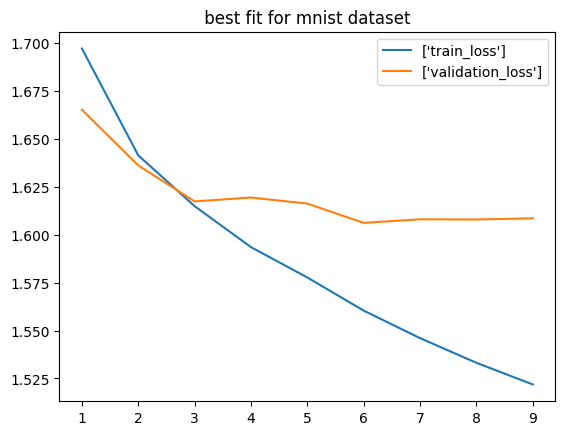

In [91]:
# checking for the underfitting and overfitting on loss
plt.plot(range(1,10),history1.history["loss"],label=["train_loss"])
plt.plot(range(1,10),history1.history["val_loss"],label=["validation_loss"])
plt.title(" best fit for mnist dataset ")
plt.legend()
plt.show()

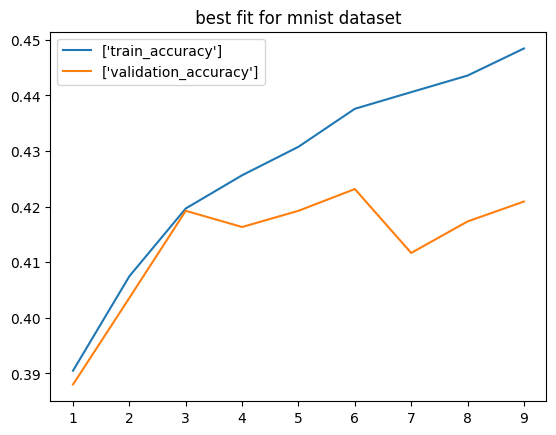

In [90]:
# checking for the underfitting and overfitting on accuracy
plt.plot(range(1,10),history1.history["accuracy"],label=["train_accuracy"])
plt.plot(range(1,10),history1.history["val_accuracy"],label=["validation_accuracy"])
plt.title(" best fit for mnist dataset ")
plt.legend()
plt.show()

In [92]:
accuracy_score(y_test,final_yi_pred)

0.8758

# Observations
1. The mnist data is trained well by the LEE NET architecture  with best fit accuracy of 87 so we can safely use the any other data with lee net architecture
2. If we use The Adam optimiser the model is overfitting so w can go with sgd opimiser bacause the adam requires more data